In [ ]:
# !pip install kagglehub[pandas-datasets]
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")
print("Path to dataset files:", path)

# The code above is from the Kaggle website where it gives a sample of how to download

'''
Step 1 of ML workflow: Reading in Dataset

'''

# joins path above with directory created
base_path = os.path.join(path, "News _dataset")

# reads cvs files
fake_df = pd.read_csv(os.path.join(base_path, "Fake.csv"))
true_df = pd.read_csv(os.path.join(base_path, "True.csv"))

# checking whether they loaded in correctly
print(fake_df.head())
print(true_df.head())


Path to dataset files: C:\Users\jaiva\.cache\kagglehub\datasets\emineyetm\fake-news-detection-datasets\versions\1
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                          

In [ ]:
'''
Step 2 of the ML Workflow: Data processing

'''

# Checking to see whether there are any missing values
print("Missing values in fake news file:")
print(fake_df.isnull().sum())

print("\nMissing values in true news file:")
print(true_df.isnull().sum())


# Checking to see if the same datatype is in each column
true_types_df = true_df.applymap(type)
fake_types_df = fake_df.applymap(type)

true_type_counts = true_types_df.nunique()
fake_type_counts = fake_types_df.nunique()

print("\nUnique datatypes in true news file: \n", true_type_counts)
print("\nUnique datatypes in fake news file: \n", fake_type_counts)


# As seen from the results below, each column has one type of datatype and 
# each column has no missing values

Missing values in fake news file:
title      0
text       0
subject    0
date       0
dtype: int64

Missing values in true news file:
title      0
text       0
subject    0
date       0
dtype: int64

Unique datatypes in true news file: 
 title      1
text       1
subject    1
date       1
dtype: int64

Unique datatypes in fake news file: 
 title      1
text       1
subject    1
date       1
dtype: int64


In [ ]:
# '''
# Step 3 of the ML Workflow: ML Model

# Note: the shuffling line was from this website: https://www.aporia.com/resources/how-to/shuffle-dataframe-rows/
# '''

# adding labels to each df, 1 = fake news, 0 = true news
fake_df['label'] = 1
true_df['label'] = 0

# # concatoning the data
df = pd.concat([fake_df, true_df], ignore_index=True)

# picking the combined column to use as the feature matrix
X = df['text']
y = df['label']

# doing a 75% train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# using tfid vectorizer as count can be misleading
# tfid realizes common words and lowers their importance
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# instantiating RandomForest model as its good at text classification
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

# predicting 
y_pred = model.predict(X_test_vec)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()



Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
ROC-AUC: 0.99
Precision-Recall AUC: 0.99


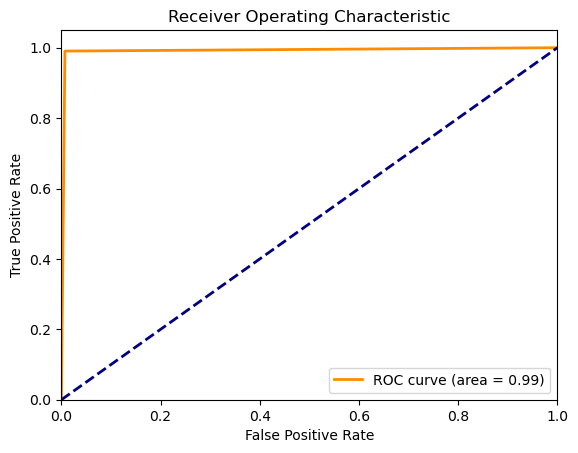

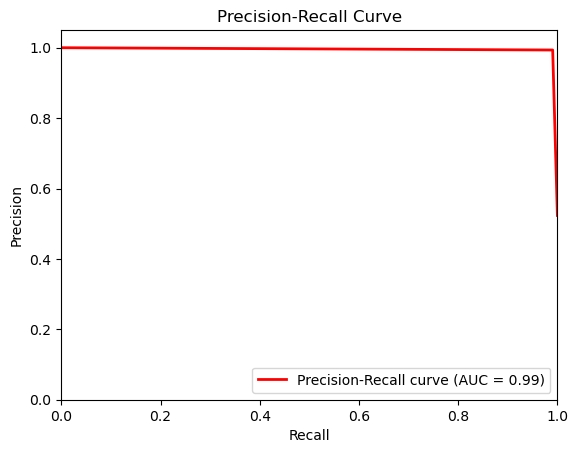

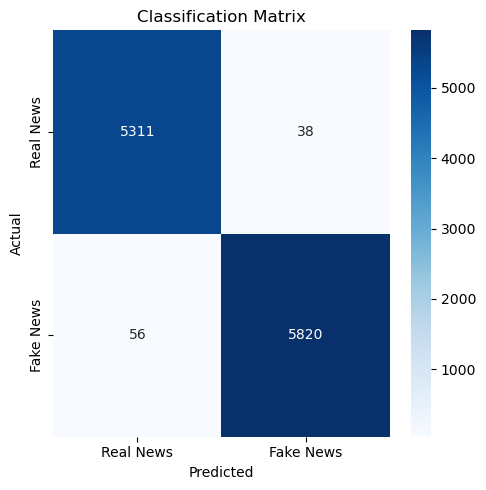

In [10]:
# '''
# Step 4 and 5 of the ML Workflow: Validation and Visualization of Results

# Note: The code below is from "Validation Metrics Practice Sol'n" that is in D2L.

# '''

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix

# Calculate validation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision_recall_auc = average_precision_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision-Recall AUC: {precision_recall_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % precision_recall_auc)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the figure suize using subplots
fig, axes = plt.subplots(figsize=(5, 5))

# Create a heatmap
sns.heatmap(cm, xticklabels=['Real News', 'Fake News'],  yticklabels=['Real News', 'Fake News'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Classification Matrix')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

plt.tight_layout()
plt.show()